In [ ]:
from google.colab import files

uploaded = files.upload()  # Ini akan membuka jendela unggahan file

Saving data_email.csv to data_email.csv


In [ ]:
import pandas as pd

# Dapatkan nama file yang diunggah (mengambil kunci dari dictionary `uploaded`)
file_name = list(uploaded.keys())[0]

# Membaca CSV ke dalam DataFrame
df = pd.read_csv(file_name, sep=';')

# Menampilkan beberapa baris pertama untuk memverifikasi data
print(df.head())

     Data   Fakta Prediksi       Evaluasi
0  email1    Spam   normal  False Positif
1  email2  normal     Spam  False Negatif
2  email3  normal     Spam  False Negatif
3  email4    Spam     Spam   True Negatif
4  email5    Spam   normal  False Positif


In [ ]:
df2 = df.drop('Data', axis=1)
print(df2.head())

    Fakta Prediksi       Evaluasi
0    Spam   normal  False Positif
1  normal     Spam  False Negatif
2  normal     Spam  False Negatif
3    Spam     Spam   True Negatif
4    Spam   normal  False Positif


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

df2 = df.drop('Data', axis=1)
print(df2)

le = LabelEncoder()
for col in ['Fakta', 'Prediksi', 'Evaluasi']:
    df2[col] = le.fit_transform(df[col])

# Mengonversi fitur biner Fakta menjadi 0/1
df2['Fakta'] = df2['Fakta'].astype(int)

# Mengonversi fitur biner Prediksi menjadi 0/1
df2['Prediksi'] = df2['Prediksi'].astype(int)

# Definisikan X dan y
X = df2.drop('Evaluasi', axis=1)  # Fitur
y = df2['Evaluasi']  # Target

print("data X:\n", X,"\n")
print("data Y:\n", y,"\n")

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Naive Bayes (MultinomialNB)
model = MultinomialNB()

# Latih model menggunakan data training
print("X train :")
print(X_train, "\n")
print("y train :")
print(y_train,"\n")
model.fit(X_train, y_train)

# Lakukan prediksi pada data testing
print("X Test ")
print(X_test,"\n")
print("y Test :")
print(y_test,"\n")
y_pred = model.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")

print(classification_report(y_test, y_pred))

     Fakta Prediksi       Evaluasi
0     Spam   normal  False Positif
1   normal     Spam  False Negatif
2   normal     Spam  False Negatif
3     Spam     Spam   True Negatif
4     Spam   normal  False Positif
5   normal   normal   True Positif
6   normal   normal   True Positif
7   normal   normal   True Positif
8   normal   normal   True Positif
9     Spam   normal  False Positif
10  normal     Spam  False Negatif
11  normal   normal   True Positif
12    Spam     Spam   True Negatif
13  normal   normal   True Positif
data X:
     Fakta  Prediksi
0       0         1
1       1         0
2       1         0
3       0         0
4       0         1
5       1         1
6       1         1
7       1         1
8       1         1
9       0         1
10      1         0
11      1         1
12      0         0
13      1         1 

data Y:
 0     1
1     0
2     0
3     2
4     1
5     3
6     3
7     3
8     3
9     1
10    0
11    3
12    2
13    3
Name: Evaluasi, dtype: int64 

X train :
  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


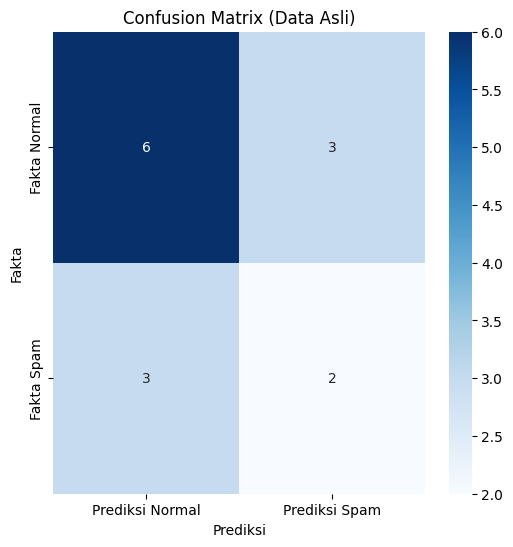

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ambil kolom Fakta dan Prediksi dari data asli sebelum split
y_actual = df2['Fakta']
y_predicted = df2['Prediksi']

# Buat confusion matrix dari data asli
cm = confusion_matrix(y_actual, y_predicted)

# Pastikan urutan sesuai dengan yang diinginkan
cm_corrected = np.array([[cm[1, 1], cm[1, 0]],
                         [cm[0, 1], cm[0, 0]]])

# Menampilkan confusion matrix dalam heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_corrected, annot=True, fmt='d', cmap='Blues', xticklabels=['Prediksi Normal', 'Prediksi Spam'],
            yticklabels=['Fakta Normal', 'Fakta Spam'])
plt.xlabel('Prediksi')
plt.ylabel('Fakta')
plt.title('Confusion Matrix (Data Asli)')
plt.show()


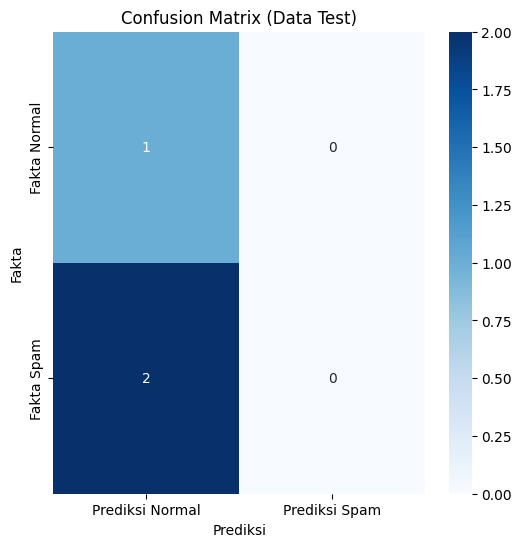

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Pastikan urutan sesuai dengan yang diinginkan
cm_corrected = np.array([[cm[1, 1], cm[1, 0]],
                         [cm[0, 1], cm[0, 0]]])

# Menampilkan confusion matrix dalam heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_corrected, annot=True, fmt='d', cmap='Blues', xticklabels=['Prediksi Normal', 'Prediksi Spam'],
            yticklabels=['Fakta Normal', 'Fakta Spam'])
plt.xlabel('Prediksi')
plt.ylabel('Fakta')
plt.title('Confusion Matrix (Data Test)')
plt.show()